In [1]:
# Qiwei Li
# https://www.linkedin.com/in/liqiwei
%matplotlib inline

from datetime import datetime
from collections import defaultdict
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def dd():
    return defaultdict(int)

checkInFreq = defaultdict(dd)
checkOutFreq = defaultdict(dd)

In [3]:
print('Opening train...')
f = open("data/train.csv", "r")
f.readline()
total = 0
    
while 1:
    line = f.readline().strip()
    total += 1
        
    if total % 5000000 == 0:
        print('Read {} lines...'.format(total))
    if line == '':
         break

    arr = line.split(",")
    checkInDate = arr[11]
    checkOutDate = arr[12]
    hotel_country = arr[21]
    hotel_market = arr[22]
    srch_destination_id = arr[16]
    is_booking = int(arr[18])
    
    if is_booking == 0:
        continue
        
    if checkInDate != '':
        checkInDateDT = datetime.strptime(checkInDate, "%Y-%m-%d")
        checkInDayOfYear = checkInDateDT.timetuple().tm_yday
        checkInFreq[(hotel_country, hotel_market, srch_destination_id)][checkInDayOfYear] += 1
        
    if checkOutDate != '':
        checkOutDateDT = datetime.strptime(checkOutDate, "%Y-%m-%d")
        checkOutDayOfYear = checkOutDateDT.timetuple().tm_yday
        checkOutFreq[(hotel_country, hotel_market, srch_destination_id)][checkOutDayOfYear] += 1
    
print('Closing train...')
f.close()

Opening train...
Read 5000000 lines...
Read 10000000 lines...
Read 15000000 lines...
Read 20000000 lines...
Read 25000000 lines...
Read 30000000 lines...
Read 35000000 lines...
Closing train...


In [4]:
checkInDensity = dict()
checkOutDensity = dict()

In [17]:
# only do the top 10
nTop = 10
sorted_top = pickle.load(open("data/sorted_top.p", "rb"))
id = []
for i in range(nTop):
    id.append((sorted_top[i])[0])

id

[('50', '628', '8250'),
 ('50', '675', '8267'),
 ('8', '110', '8791'),
 ('70', '19', '8253'),
 ('50', '682', '8268'),
 ('204', '27', '8745'),
 ('50', '628', '12206'),
 ('50', '1230', '8279'),
 ('50', '701', '8260'),
 ('163', '1503', '11439')]

In [6]:
for key, value in checkInFreq.iteritems():
    if any(key == s for s in id):
        p = np.poly1d(np.polyfit(value.keys(), value.values(), 12))
        checkInDensity[key] = p
    
for key, value in checkOutFreq.iteritems():
    if any(key == s for s in id):
        p = np.poly1d(np.polyfit(value.keys(), value.values(), 12))
        checkOutDensity[key] = p

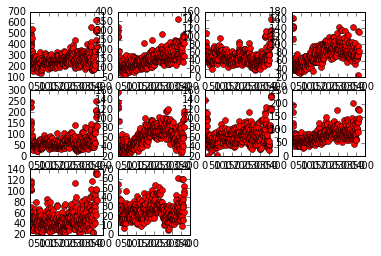

In [7]:
for i in range(10):
    plt.subplot(3,4,i+1)
    key = id[i]
    x = (checkInFreq[key]).keys()
    y = (checkOutFreq[key]).values()
    plt.plot(x,y,'ro')

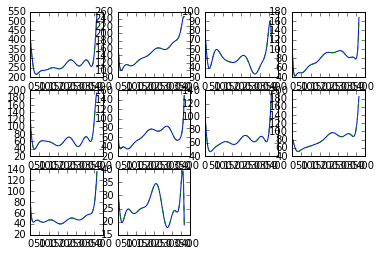

In [8]:
for i in range(10):
    plt.subplot(3,4,i+1)
    key = id[i]
    p = checkInDensity[key]
    xp = np.linspace(0, 366, 100)
    plt.plot(xp, p(xp), '-', xp, p(xp), '--')

In [23]:
def dd():
    return defaultdict(int)

checkInReady = defaultdict(dd)
checkOutReady = defaultdict(dd)

In [24]:
for i in id:
    p = checkInDensity[i]
    for j in range(366):
        checkInReady[i][j] = p(j)

In [25]:
for i in id:
    p = checkOutDensity[i]
    for j in range(366):
        checkOutReady[i][j] = p(j)

In [26]:
pickle.dump(checkInReady, open("data/checkInReady.p", "wb"))
pickle.dump(checkOutReady, open("data/checkOutReady.p", "wb"))